# Spirals and the Danger of Extrapolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns 

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import nmslib

from macest.classification import models as clmod

from plotting_utils import make_two_spirals, plot_prediction_conf_surface, plot_macest_sklearn_comparison_surface

In [2]:
sns.set_style('darkgrid')
sns.set_context('notebook')

In [3]:
x_20, x_21, y_20, y_21 = make_two_spirals(0.5, 0.5, 3 * 10**4, 0.15)

X1 = np.hstack((x_20, x_21))
X2 = np.hstack((y_20, y_21))
X = np.array((X1, X2)).T
y = np.hstack((np.zeros(3 *10**4), np.ones(3 *10**4))).astype(int)

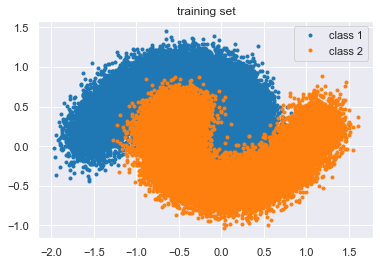

In [4]:
plt.title('training set')
plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()

In [5]:
X_pp_train, X_conf_train, y_pp_train, y_conf_train  = train_test_split(X, y, test_size=0.6, random_state=0)
X_conf_train, X_cal, y_conf_train, y_cal = train_test_split(X_conf_train, y_conf_train,
                                                            test_size=0.5, random_state=0)
X_cal, X_test, y_cal,  y_test, = train_test_split(X_cal, y_cal, test_size=0.5, random_state=0)

In [6]:
model = RandomForestClassifier(random_state =0,
                               n_estimators =800)

model.fit(X_pp_train, y_pp_train)

RandomForestClassifier(n_estimators=800, random_state=0)

In [7]:
macest_model = clmod.ModelWithConfidence(model,
                                      X_conf_train,
                                      y_conf_train)

macest_model.fit(X_cal, y_cal)

## What does the surface learnt by the random forest  look like ?

/Users/mattrowe/code/macest/notebooks/classification/plotting_utils.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0, 0].scatter(X_pp_train[:, 0], X_pp_train[:, 1], c=y_pp_train,
/Users/mattrowe/code/macest/notebooks/classification/plotting_utils.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0, 1].scatter(X_pp_train[:, 0], X_pp_train[:, 1],
/Users/mattrowe/code/macest/notebooks/classification/plotting_utils.py:61: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1, 0].scatter(X_pp_train[:, 0], X_pp_train[:, 1],
/Users/mattrowe/code/macest/notebooks/classification/plotting_utils.py:66: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1, 1].scatter(X_pp_train[:, 0], X_pp_train[:, 1],


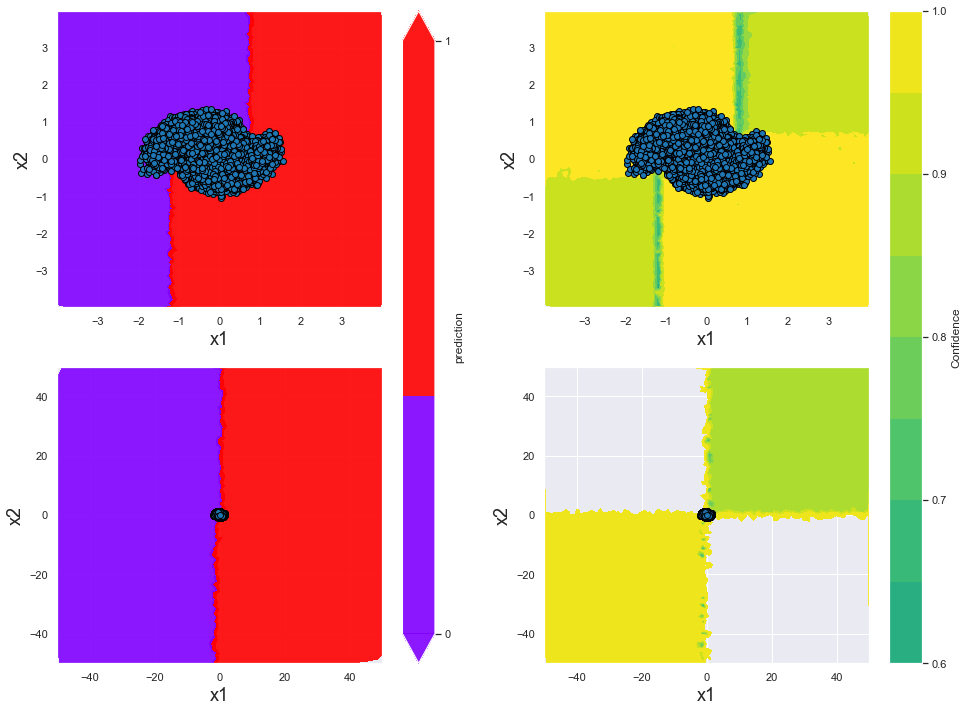

In [8]:
plot_prediction_conf_surface(4, 50, model, X_pp_train)

### Let's Compare with MACE

/Users/mattrowe/code/macest/notebooks/classification/plotting_utils.py:183: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0, 0].scatter(X_pp_train[:, 0], X_pp_train[:, 1],
/Users/mattrowe/code/macest/notebooks/classification/plotting_utils.py:188: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0, 1].scatter(X_pp_train[:, 0], X_pp_train[:, 1],
/Users/mattrowe/code/macest/notebooks/classification/plotting_utils.py:199: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1, 0].scatter(X_pp_train[:, 0], X_pp_train[:, 1],
/Users/mattrowe/code/macest/notebooks/classification/plotting_utils.py:210: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1, 1].scatter(X_pp_train[:, 0], X_pp_train[:, 1],


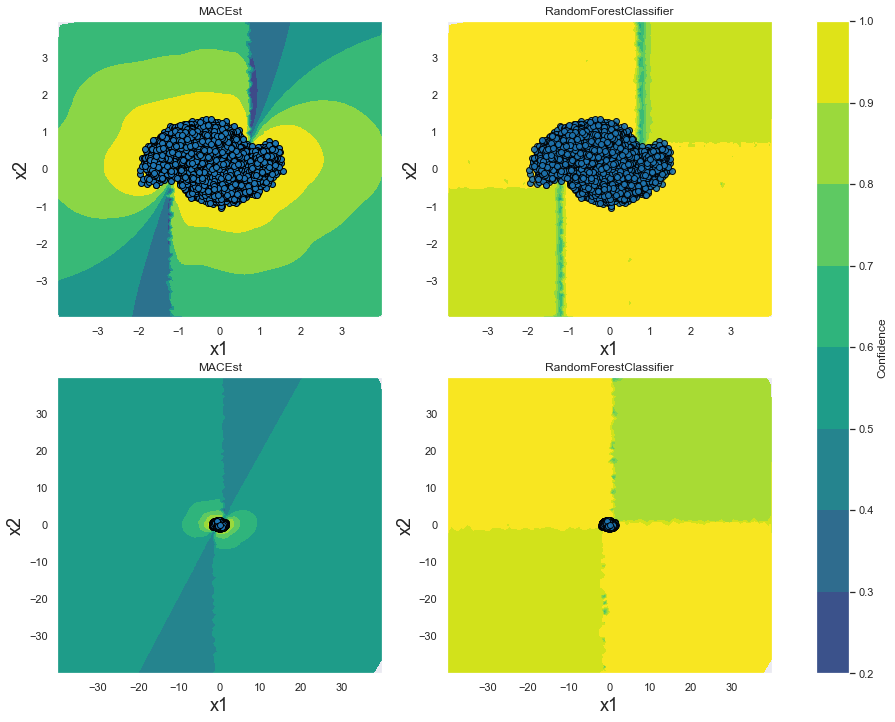

In [9]:
plot_macest_sklearn_comparison_surface(4, 40, macest_model, model, X_pp_train)

## Let's now extrapolate the original function

### The predictions effectively have a 50/50 chance of being correct but the Random Forest has a very high confidence for every prediction,This example is clearly quite extreme however it highlights the problem of extrapolating confidence, we do not have any information about this function even a very small distance from the training data

In [10]:
x_20, x_21, y_20, y_21 = make_two_spirals(1, 2, 2 * 10**4, 0.1)

X1 = np.hstack((x_20, x_21))
X2 = np.hstack((y_20, y_21))
X = np.array((X1, X2)).T
y = np.hstack((np.zeros(2 *10**4), np.ones(2 *10**4))).astype(int)

Text(0, 0.5, 'x2')

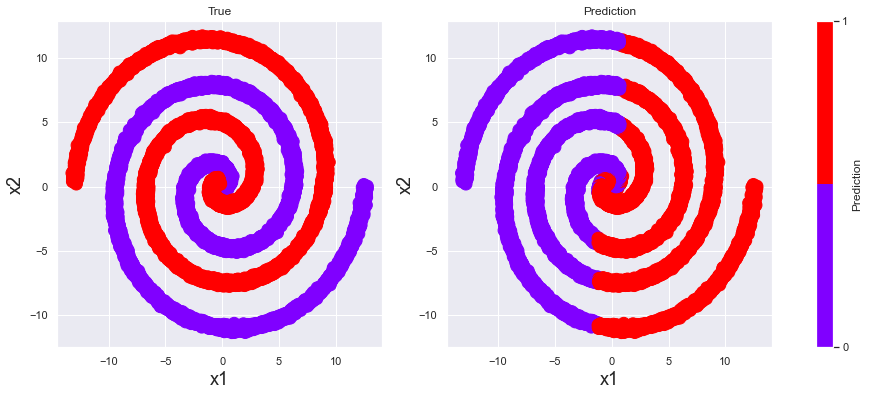

In [11]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,6))

h1 = ax[0].scatter(X[:,0],
                   X[:,1],
                   c= y,
                   cmap = cm.get_cmap('rainbow', 2),
                   vmin = 0., 
                   vmax = 1,
                   s=150)

g1 = ax[1].scatter(X[:,0],
                   X[:,1],
                   c= model.predict(X),
                   cmap = cm.get_cmap('rainbow', 2),
                   vmin = 0., 
                   vmax = 1,
                   s=150)

fig.colorbar(g1,
             ax = ax.ravel(),
             ticks= np.arange(0.,1.01, 1), 
             label = 'Prediction' )

ax[0].set_title('True')
ax[1].set_title('Prediction')

ax[0].set_xlabel('x1', fontsize = 18)
ax[1].set_xlabel('x1', fontsize = 18)

ax[0].set_ylabel('x2', fontsize = 18)
ax[1].set_ylabel('x2', fontsize = 18)

Text(0, 0.5, 'x2')

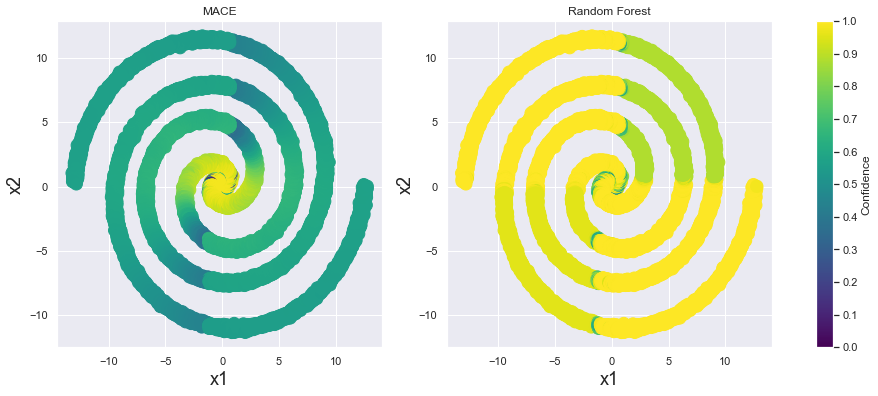

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (16,6))

h1 = ax[0].scatter(X[:,0],
                   X[:,1],
                   c= macest_model.predict_confidence_of_point_prediction(X),
                   cmap = cm.viridis,
                   vmin = 0., 
                   vmax = 1,
                   s=150)

g1 = ax[1].scatter(X[:,0],
                   X[:,1],
                   c= np.amax(model.predict_proba(X), axis =1),
                   cmap = cm.viridis,
                   vmin = 0., 
                   vmax = 1,
                   s=150)

fig.colorbar(g1,
             ax = ax.ravel(),
             ticks= np.arange(0.,1.01, 0.1 ), 
             label = 'Confidence' )

ax[0].set_title('MACE')
ax[1].set_title('Random Forest')

ax[0].set_xlabel('x1', fontsize = 18)
ax[1].set_xlabel('x1', fontsize = 18)

ax[0].set_ylabel('x2', fontsize = 18)
ax[1].set_ylabel('x2', fontsize = 18)